# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

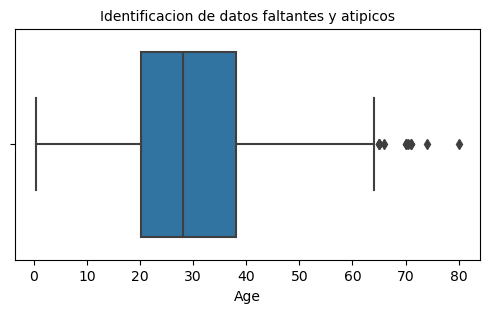

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [6]:
print('Cantidad de registros con NaN en Age', Datos['Age'].isna().sum())
print('Cantidad de registros con cero en Fare:', (Datos['Fare'] == 0).sum())

Cantidad de registros con NaN en Age 177
Cantidad de registros con cero en Fare: 15


In [22]:
Datos['Age'] = pd.to_numeric(Datos['Age'], errors='coerce')
promedio_age = Datos['Age'].mean()
Datos['Age'].fillna(promedio_age, inplace=True)
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [8]:
print('Cantidad de registros con NaN en Age', Datos['Age'].isna().sum())
print('Cantidad de registros con cero en Age', (Datos['Age']==0).sum())
print('Cantidad de registros con cero en Fare:', (Datos['Fare'] == 0).sum())

Cantidad de registros con NaN en Age 0
Cantidad de registros con cero en Age 0
Cantidad de registros con cero en Fare: 0


Text(0.5, 1.0, 'Identificacion de datos atipicos FARE')

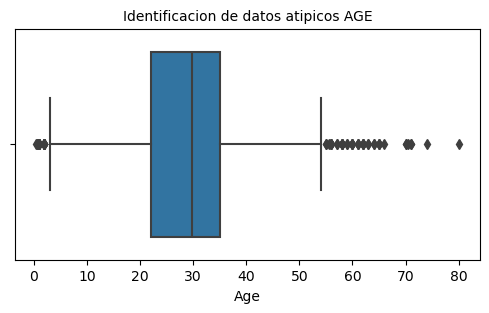

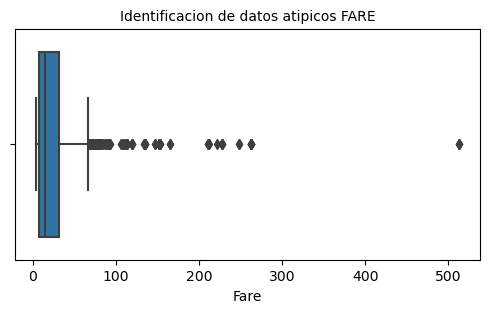

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos atipicos AGE',fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificacion de datos atipicos FARE',fontsize=10)

In [23]:
edad_minima=0
edad_maxima=90
total_atipicos=((Datos['Age']<edad_minima)|(Datos['Age']>edad_maxima)).sum()
print('El total de datos atipicos de AGE es {}'.format(total_atipicos))

nivel_minimo=5
nivel_maximo=100
total_atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print('El total de datos atipicos de FARE es {}'.format(total_atipicos))

El total de datos atipicos de AGE es 0
El total de datos atipicos de FARE es 54


In [24]:
Datos=Datos[(Datos['Fare']>nivel_minimo)&(Datos['Fare']<nivel_maximo)]

In [25]:
total_atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print('El total de datos atipicos de FARE es {}'.format(total_atipicos))

El total de datos atipicos de FARE es 0


In [13]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  836 non-null    int64  
 1   Survived     836 non-null    int64  
 2   Pclass       836 non-null    int64  
 3   Name         836 non-null    object 
 4   Sex          836 non-null    object 
 5   Age          836 non-null    float64
 6   SibSp        836 non-null    int64  
 7   Parch        836 non-null    int64  
 8   Ticket       836 non-null    object 
 9   Fare         836 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     834 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.9+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de interes:
Sobrevivio: Si el pasajero sobrevivio o no
Predecir si una persona iba a sobrevivir

In [26]:
Datos['Survived'].value_counts()

Survived
0    533
1    303
Name: count, dtype: int64

In [27]:
Datos[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [28]:
Datos = Datos.drop(['Name', 'Ticket', 'Cabin'], axis=1)
Datos = pd.get_dummies(Datos, columns=['Sex', 'Embarked'], drop_first=True)

# Porcentaje datos para entrenamiento = 75% y para prueba = 25%
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived']

X_train,X_text,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, stratify=Y,random_state=0)

In [29]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
252          253       1  62.0      0      0  26.5500      True       False   
587          588       1  60.0      1      1  79.2000      True       False   
542          543       3  11.0      4      2  31.2750     False       False   
647          648       1  56.0      0      0  35.5000      True       False   
424          425       3  18.0      1      1  20.2125      True       False   
..           ...     ...   ...    ...    ...      ...       ...         ...   
521          522       3  22.0      0      0   7.8958      True       False   
316          317       2  24.0      1      0  26.0000     False       False   
651          652       2  18.0      0      1  23.0000     False       False   
821          822       3  27.0      0      0   8.6625      True       False   
441          442       3  20.0      0      0   9.5000      True       False   

     Embarked_S  
252        True  
587       False

In [30]:
print(Y_train)

252    0
587    1
542    0
647    1
424    0
      ..
521    0
316    1
651    1
821    1
441    0
Name: Survived, Length: 627, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [32]:
modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit(X_train,Y_train)
prediccion = modelo_regresion.predict(X_text)

In [33]:
print(Y_test)

479    1
255    1
51     0
350    0
668    0
      ..
211    1
59     0
132    0
662    0
58     1
Name: Survived, Length: 209, dtype: int64


In [34]:
print(prediccion)

[1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [35]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       133
           1       0.74      0.67      0.70        76

    accuracy                           0.79       209
   macro avg       0.78      0.77      0.77       209
weighted avg       0.79      0.79      0.79       209



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

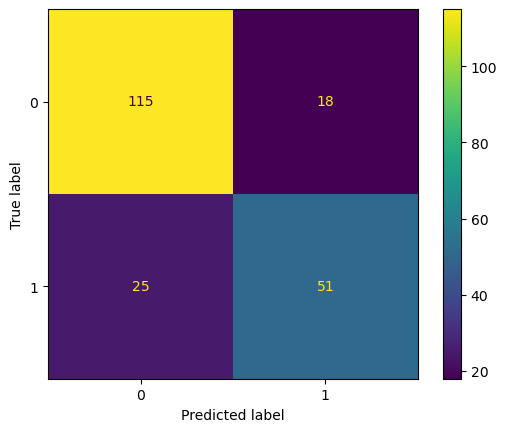

In [36]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

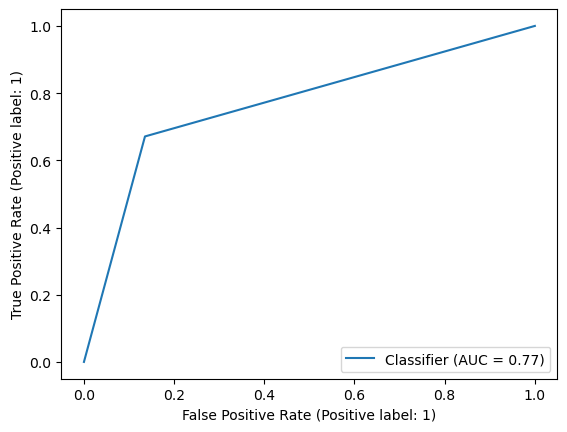

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,prediccion)
plt.show()